# Python Übung 2: Maschinelles Lernen

##### In dieser Python Übung befassen wir uns mit der Anwendung maschineller Lernverfahren auf Bilddaten. Dazu verwenden wir den MNIST Datensatz. Dies ist ein sehr bekannter Datensatz für das Benchmarking von Deep Learning Algorithmen. Zunächst installieren wir alle benötigten Packages und importieren diese.

##### Falls Python für Sie neu ist, empfehlen wir Ihnen folgendes Tutorial: https://www.w3schools.com/python/

In [1]:
# Installation notwendiger Packages
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install matplotlib
!pip install seaborn

In [2]:
# Import notwendiger Packages
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import SGD

import numpy as np
from matplotlib import pyplot
import seaborn as sns

##### Der MNIST Datensatz besteht aus 70.000 Bildern der Größe 28x28 Pixel. Die Bilder enthalten dabei die Zahlen von 0 bis 9. Wir laden zunächst den Datensatz und überprüfen die Dimensionen der Daten.

In [3]:
# Lade den Datensatz
(trainX, trainY), (testX, testY) = mnist.load_data()

# Gebe einen Überblick über die Dimensionen aus
print('Train: X={trainX}, y={trainY}'.format(trainX = trainX.shape, trainY = trainY.shape))
print('Test: X={testX}, y={testY}'.format(testX = testX.shape, testY = testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


##### Wir visualisieren nun ein paar Trainingsdaten. 

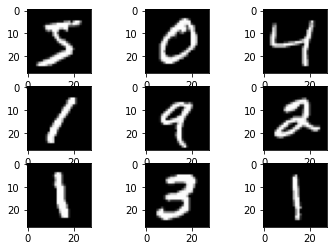

In [4]:
# Plot der ersten 9 Trainingsbilder
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap = pyplot.get_cmap('gray'))
pyplot.show()

# Teil 1: Support Vector Machine (SVM)

##### Zunächst verwenden wir eine SVM zur Klassifikation der Bilddaten. Da SVMs eindimensionale Inputdaten erwarten, müssen die Bilddaten in diese Form transformiert werden.

In [5]:
trainX_1d = trainX.reshape((60000, 28*28))
testX_1d = testX.reshape((10000, 28*28))

# Gebe einen Überblick über die Dimensionen aus
print('Train: X={trainX}, y={trainY}'.format(trainX = trainX_1d.shape, trainY = trainY.shape))
print('Test: X={testX}, y={testY}'.format(testX = testX_1d.shape, testY = testY.shape))

Train: X=(60000, 784), y=(60000,)
Test: X=(10000, 784), y=(10000,)


##### Die SVM wird zunächst mit den Trainingsdaten trainiert. Zur Verringerung der Rechenzeit beschränken wir die maximale Anzahl an Iterationen. Anschließend wird das Modell dazu verwendet, um die Daten aus dem Hold Out Testdatensatz vorherzusagen.

In [6]:
# instanziiere eine SVM
svm = SVC(max_iter = 50)

# trainiere die SVM mit den Trainingsdaten
svm.fit(trainX_1d, trainY)

# sage die Testdaten vorher
predY_svm = svm.predict(testX_1d)

/home/jp/anaconda3/envs/anwki/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


##### Mithilfe der Testdaten berechnen wir die Konfusionsmatrix für das Modell.

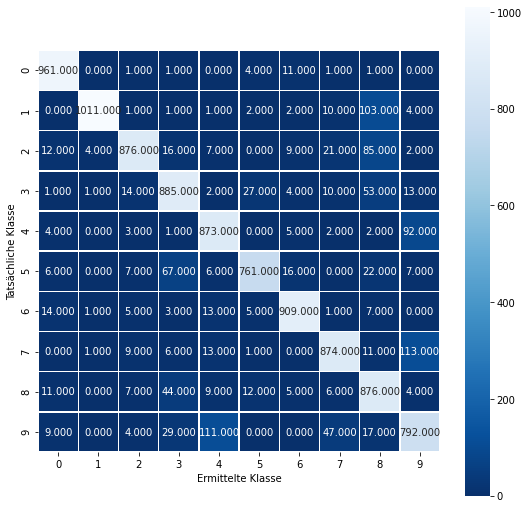

In [7]:
# berechne die Konfusionsmatrix
cm = metrics.confusion_matrix(testY, predY_svm)

# plotte die Matrix
pyplot.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
pyplot.ylabel('Tatsächliche Klasse');
pyplot.xlabel('Ermittelte Klasse');

### Aufgabe 1: Berechnen Sie Accuracy, Precision und Recall des Modells.
##### Hinweis: Es empfielt sich, eine Funktion dafür zu schreiben, da die Metriken im späteren Verlauf wieder benötigt werden. Eine Dokumentation zu den Metriken in sklearn finden Sie hier: https://scikit-learn.org/stable/modules/model_evaluation.html

In [8]:
# Funktion zur Berechnung der Metriken
def compute_metrics(testY, predY):
    # berechne die Metriken
    accuracy = metrics.accuracy_score(testY, predY)
    precision = metrics.precision_score(testY, predY, average = 'macro')
    recall = metrics.recall_score(testY, predY, average = 'macro')
    
    # gebe die Ergebnisse aus
    print("Accuracy: {accuracy} \nPrecision: {precision} \nRecall: {recall}".format(
        accuracy=accuracy, precision=precision, recall=recall))

In [9]:
# berechne die Metriken
compute_metrics(testY, predY_svm)

Accuracy: 0.8818 
Precision: 0.886375159154747 
Recall: 0.882194291716818


### Aufgabe 2: Welche Parameterwerte hat das SVM Modell standardmäßig?
##### Hinweis: Eine Dokumentation zu SVMs in sklearn finden Sie hier: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [10]:
# gebe die Standard-Parameter des Modells aus
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 50,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Aufgabe 3: Verwenden Sie nun eine SVM mit linearem Kernel. Vergleichen Sie die Performance des neuen Modells mit dem Standard-Modell.

In [11]:
# instanziiere eine SVM
svm_linear = SVC(max_iter = 50, kernel = 'linear')

# trainiere die SVM mit den Trainingsdaten
svm_linear.fit(trainX_1d, trainY)

# sage die Testdaten vorher
predY_svm_linear = svm_linear.predict(testX_1d)

/home/jp/anaconda3/envs/anwki/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [12]:
# berechne die Metriken
compute_metrics(testY, predY_svm_linear)

Accuracy: 0.6303 
Precision: 0.6400272773442751 
Recall: 0.6318450133579526


##### Antwort: Der lineare Kernel führt zu einer Verschlechterung des Testergebnisses.

# Teil 2: Multi Layer Perceptron (MLP)

##### Im nächsten Schritt verwenden wir ein Feed-Forward Neuronales Netz. Dabei beschränken wir wieder die Anzahl an Iterationen, um die Rechenzeit zu begrenzen. Das MLP erwartet ebenso wie die SVM eindimensionale Inputs.

In [13]:
# instanziiere ein neuronales Netz
mlp = MLPClassifier(max_iter = 50, verbose = True)

# trainiere das MLP mit den Trainingsdaten
mlp.fit(trainX_1d, trainY)

# sage die Testdaten vorher
predY_mlp = mlp.predict(testX_1d)

Iteration 1, loss = 3.34470888
Iteration 2, loss = 1.00215730
Iteration 3, loss = 0.53571673
Iteration 4, loss = 0.33873916
Iteration 5, loss = 0.24558858
Iteration 6, loss = 0.19735797
Iteration 7, loss = 0.16850819
Iteration 8, loss = 0.14329054
Iteration 9, loss = 0.12840259
Iteration 10, loss = 0.12404193
Iteration 11, loss = 0.11368434
Iteration 12, loss = 0.10592365
Iteration 13, loss = 0.11685125
Iteration 14, loss = 0.11107638
Iteration 15, loss = 0.09850842
Iteration 16, loss = 0.09687818
Iteration 17, loss = 0.08867341
Iteration 18, loss = 0.09591685
Iteration 19, loss = 0.09242045
Iteration 20, loss = 0.09577434
Iteration 21, loss = 0.08564305
Iteration 22, loss = 0.08601796
Iteration 23, loss = 0.07637984
Iteration 24, loss = 0.07593063
Iteration 25, loss = 0.06967986
Iteration 26, loss = 0.07782451
Iteration 27, loss = 0.07760295
Iteration 28, loss = 0.07892366
Iteration 29, loss = 0.06887684
Iteration 30, loss = 0.07248955
Iteration 31, loss = 0.06963271
Iteration 32, los

/home/jp/anaconda3/envs/anwki/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


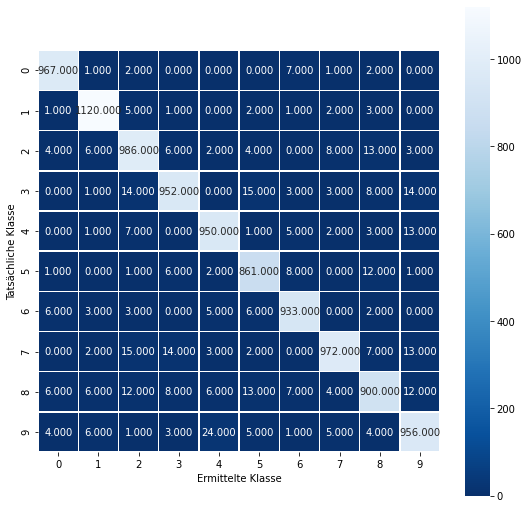

In [14]:
# berechne die Konfusionsmatrix
cm = metrics.confusion_matrix(testY, predY_mlp)

# plotte die Matrix
pyplot.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r');
pyplot.ylabel('Tatsächliche Klasse');
pyplot.xlabel('Ermittelte Klasse');

### Aufgabe 4: Berechnen Sie erneut Accuracy, Precision und Recall des Modells. Welche Parameterwerte hat das neuronale Netz standardmäßig?

##### Hinweis: Eine Dokumentation zu MLPs in sklearn finden Sie hier: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [15]:
# berechne die Metriken
compute_metrics(testY, predY_mlp)

Accuracy: 0.9597 
Precision: 0.9594002904651878 
Recall: 0.9595106171963422


In [16]:
# gebe die Standard-Parameter des Modells aus
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 50,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

### Aufgabe 5: Wie lässt sich die Performance des Modells verbessern? Experimentieren Sie mit den Modellparametern. Welche Parameter haben hierbei einen entscheidenden Einfluss?

In [17]:
# definiere die Modellparameter
params = {
    'max_iter': 50,
    'verbose': True,
    'hidden_layer_sizes': (200,)
}

# instanziiere ein neuronales Netz
mlp_new = MLPClassifier(**params)

# trainiere das MLP mit den Trainingsdaten
mlp_new.fit(trainX_1d, trainY)

# sage die Testdaten vorher
predY_mlp_new = mlp_new.predict(testX_1d)

Iteration 1, loss = 2.84600857
Iteration 2, loss = 0.90737644
Iteration 3, loss = 0.50401027
Iteration 4, loss = 0.34053995
Iteration 5, loss = 0.24342131
Iteration 6, loss = 0.18530904
Iteration 7, loss = 0.15994815
Iteration 8, loss = 0.13666682
Iteration 9, loss = 0.14414219
Iteration 10, loss = 0.12142808
Iteration 11, loss = 0.11806949
Iteration 12, loss = 0.12465381
Iteration 13, loss = 0.12215987
Iteration 14, loss = 0.13067746
Iteration 15, loss = 0.11858803
Iteration 16, loss = 0.10088848
Iteration 17, loss = 0.09684578
Iteration 18, loss = 0.07777555
Iteration 19, loss = 0.12810451
Iteration 20, loss = 0.12641501
Iteration 21, loss = 0.09056976
Iteration 22, loss = 0.09706698
Iteration 23, loss = 0.08408125
Iteration 24, loss = 0.06791011
Iteration 25, loss = 0.09296581
Iteration 26, loss = 0.10290063
Iteration 27, loss = 0.07781955
Iteration 28, loss = 0.09290510
Iteration 29, loss = 0.09899852
Iteration 30, loss = 0.10081730
Iteration 31, loss = 0.08504445
Iteration 32, los

In [18]:
# berechne die Metriken
compute_metrics(testY, predY_mlp_new)

Accuracy: 0.974 
Precision: 0.973893380785575 
Recall: 0.9737204333794741


##### Die Performance des Modells kann z.B. durch eine Erhöhung der Neuronenanzahl im Hidden Layer verbessert werden. Dadurch steigt die Komplexität des Modells.

# Teil 3: Convolutional Neural Network (CNN)

##### Zuletzt schauen wir uns CNNs an. Für ausführlichere Erläuterungen sei auf https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/ verwiesen. Wie Sie in der Vorlesung bereits erfahren haben, sind CNNs State of the Art, wenn es um die Klassifikation von Bildern geht. Bevor wir das Klassifikationsmodell erstellen, müssen die MNIST Daten noch transformiert werden. Im Gegensatz zu SVMs und MLPs erwartet ein CNN dreidimensionale Inputs. Ein Eingabebild muss in der Dimension b x h x c übergeben werden, wobei:
##### b: Breite des Bildes (#Pixel)
##### h: Höhe des Bildes (#Pixel)
##### c: Anzahl der Channels, bei Schwarz/Weiß-Bildern: 1, bei Farb-Bildern: 3 (für die Pixelcodierung in rot, grün und blau)

In [19]:
# transformiere den Datensatz
trainX_cnn = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX_cnn = testX.reshape((testX.shape[0], 28, 28, 1))

##### Die Pixelwerte im Datensatz liegen zwischen 0 (schwarz) und 255 (weiß). Bevor wir das CNN-Modell erstellen, sollte der Datensatz normalisiert werden, z.B. durch Skalierung der Pixelfarbwerte auf das Intervall [0,1].

In [20]:
# skaliere die Trainingsdaten
trainX_cnn = trainX_cnn.astype('float32')
trainX_cnn = trainX_cnn / 255.0

# skaliere die Testdaten
testX_cnn = testX_cnn.astype('float32')
testX_cnn = testX_cnn / 255.0

##### Außerdem codieren wir den Output des Netzes, so dass das CNN später 10 Outputneuronen besitzt (für jede Zahl von 0-9 eine)

In [21]:
# Kodierung des Outputs
trainY_cnn = to_categorical(trainY)
testY_cnn = to_categorical(testY)

##### Nun erstellen wir ein CNN mit einem Convolutional Layer, einem Max Pooling Layer und einem Fully Connected Layer. Wir trainieren das Modell mit dem stochastischen Gradientenabstiegsverfahren (SGD).

In [22]:
# erstelle ein CNN-Modell
def create_cnn():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', 
                     input_shape = (28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))
    
    # kompiliere das Modell
    opt = SGD(lr = 0.01, momentum = 0.9)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

### Aufgabe 6: Führen Sie k-Fold Cross Validation (k = 4) mit dem oben definierten CNN-Modell durch. Greifen Sie dabei auf die Funktion create_cnn zurück. Wie robust ist das Modell?
##### Hinweis: Hierfür müssen Sie nur auf die Trainingsdaten zurückgreifen. Sie können die KFold Funktion von sklearn verwenden: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [23]:
# erstelle Listen zum Speichern der Validierungsergebnisse
scores, histories = list(), list()

# definiere die Parameter der k-Fold Cross Validation
kfold = KFold(n_splits = 4)

# Zählvariable für die Schleife
count = 0

# führe die Cross Validation aus
for train_index, test_index in kfold.split(trainX):
    
    # Zählvariable ausgeben
    count = count + 1
    print("\nDurchlauf {} von 4:".format(count))
    
    # erstelle ein Modell
    model = create_cnn()
    
    # ermittle die Trainings- und Testdaten des aktuellen Durchlaufs
    trainX_cv, trainY_cv = trainX_cnn[train_index], trainY_cnn[train_index]
    testX_cv, testY_cv = trainX_cnn[test_index], trainY_cnn[test_index]
    
    # trainiere das Modell
    history = model.fit(trainX_cv, trainY_cv, epochs = 10, batch_size = 32, 
                        validation_data = (testX_cv, testY_cv), verbose = True)
    
    # evaluiere das Modell
    _, acc = model.evaluate(testX_cv, testY_cv, verbose = True)
    
    # speichere die Validierungsergebnisse
    scores.append(acc)
    histories.append(history)


Durchlauf 1 von 4:
Epoch 1/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1822 - accuracy: 0.9448 - val_loss: 0.0844 - val_accuracy: 0.9747
Epoch 2/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0649 - accuracy: 0.9795 - val_loss: 0.0736 - val_accuracy: 0.9772
Epoch 3/10
1407/1407 [==============================] - 18s 13ms/step - loss: 0.0432 - accuracy: 0.9872 - val_loss: 0.0569 - val_accuracy: 0.9833
Epoch 4/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0576 - val_accuracy: 0.9819
Epoch 5/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0536 - val_accuracy: 0.9847
Epoch 6/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0535 - val_accuracy: 0.9849
Epoch 7/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0094 - accuracy: 0.9977 

In [24]:
# gebe die Accuracy der 4 Durchläufe aus
for score in scores:
    print('> %.3f' % (score * 100.0))

# berechne Mittelwert und Standardabweichung der Accuracy
print("Mittelwert: {}".format(np.mean(scores) * 100))
print("Standardabweichung: {}".format(np.std(scores) * 100))

> 98.647
> 98.540
> 98.393
> 98.400
Mittelwert: 98.49500060081482
Standardabweichung: 0.10534231991133558


##### Antwort: Das CNN-Modell ist sehr robust, da die Performance der 4 Durchläufe der k-Fold Cross Validation sehr nahe aneinander liegen.

### Aufgabe 7: Trainieren Sie das obige CNN-Modell nun mit dem kompletten Trainingsdatensatz. Wie hoch ist die Accuracy auf dem Testdatensatz?
##### Hinweis: Sie können diese Aufgabe auch bearbeiten, falls Sie die Aufgabe 6 nicht lösen konnten.

In [25]:
# instanziiere das CNN und trainiere es
cnn = create_cnn()
history = cnn.fit(trainX_cnn, trainY_cnn, epochs = 10, verbose = True)

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1615 - accuracy: 0.9517
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0549 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0365 - accuracy: 0.9889
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0244 - accuracy: 0.9928
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0107 - accuracy: 0.9973
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0084 - accuracy: 0.9977
Epoch 8/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0049 - accuracy: 0.9990
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 10/10
1875/1875 [==============================] - 24s 13m

In [26]:
# berechne die Accuracy des Modells
_, acc = cnn.evaluate(testX_cnn, testY_cnn)
print("Accuracy: {}".format(acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9877
Accuracy: 0.9876999855041504


##### Wie wir sehen, ist die Vorhersagegenauigkeit des CNN-Modells bereits sehr hoch. Zur Veranschaulichung plotten wir ein zufälliges Bild aus dem Testdatensatz und schauen uns an, was die Vorhersage des Modells ist. Die Vorhersageergebnisse des CNNs stehen dabei für die Wahrscheinlichkeiten, die das Modell den Klassen (Zahlen von 0-9) zuordnet.

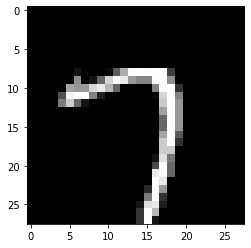

Vorhersage des CNNs: 
[3.6452654e-09 5.6734323e-10 1.0668008e-08 7.8538960e-08 1.4362403e-09
 2.2701565e-11 3.0828607e-15 9.9999964e-01 2.3517699e-09 2.9130325e-07]


In [27]:
# zufälliger Index für ein Bild aus dem Testdatensatz
image_index = 26

# plotte das Bild
pyplot.imshow(testX[image_index], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# berechne die Vorhersage des CNNs
image = testX_cnn[image_index].reshape(1, 28, 28, 1)
digit = cnn.predict(image)
print("Vorhersage des CNNs: \n{}".format(digit[0]))

### Aufgabe 8: Können Sie die Vorhersagegenauigkeit noch weiter steigern? Welche Modellparameter lassen sich beim CNN dazu noch verändern? Experimentieren Sie.

In [28]:
# erstelle ein neues CNN-Modell mit einem weiteren Convolutional Layer und Max Pooling Layer
cnn_new = Sequential()
cnn_new.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
cnn_new.add(MaxPooling2D((2, 2)))
cnn_new.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer = 'he_uniform'))
cnn_new.add(MaxPooling2D((2, 2)))
cnn_new.add(Flatten())
cnn_new.add(Dense(100, activation = 'relu', kernel_initializer = 'he_uniform'))
cnn_new.add(Dense(10, activation = 'softmax'))

# kompiliere das Modell
opt = SGD(lr = 0.01, momentum = 0.9)
cnn_new.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
# trainiere das neue CNN-Modell
history = cnn_new.fit(trainX_cnn, trainY_cnn, epochs = 10, verbose = True)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1286 - accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0113 - accuracy: 0.9965
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0091 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0073 - accuracy: 0.9978
Epoch 9/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0056 - accuracy: 0.9983
Epoch 10/10
1875/1875 [==============================] - 33s 18m

In [30]:
# berechne die Accuracy des Modells
_, acc = cnn_new.evaluate(testX_cnn, testY_cnn)
print("Accuracy: {}".format(acc))

313/313 [==============================] - 2s 5ms/step - loss: 0.0345 - accuracy: 0.9913
Accuracy: 0.9912999868392944
